In [1]:
from adaline import *
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('../perceptron-train.csv',names=['target','col1','col2'])
test = pd.read_csv('../perceptron-test.csv',names=['target','col1','col2'])

In [3]:
train['col2'] = (train['col2'] - train['col2'].mean()) / train['col2'].std()

test['col2'] = (test['col2'] - test['col2'].mean()) / test['col2'].std()

In [4]:
test.head()

,target,col1,col2
0,-1.0,1.651437,1.220010
1,1.0,-0.866495,1.083781
2,-1.0,0.789828,-0.469184
3,-1.0,0.179549,1.799168
4,1.0,-0.434351,0.503610


In [5]:
x_train = train[['col1','col2']].to_numpy()
y_train = train['target'].to_numpy().reshape(-1,1)

x_test = test[['col1','col2']].to_numpy()
y_test = test['target'].to_numpy().reshape(-1,1)

In [6]:
x_train.size

600

In [7]:
x_train.shape

(300, 2)

In [8]:
clf = Adaline(taxa_aprendizado=1e-3,tolerancia=1e-20)

clf.fit(x_train,y_train)

y_hat = clf.predict(x_test)

Peso Epoch 1: [-0.69453908  0.03389763  0.20260139] Erro quadratico: [2.09096153]
Peso Epoch 2: [-0.47847756 -0.13788888  0.01404418] Erro quadratico: [1.32125674]
Peso Epoch 3: [-0.32571315 -0.25470354 -0.1138223 ] Erro quadratico: [0.6297695]
Peso Epoch 4: [-0.21774355 -0.33419797 -0.20052445] Erro quadratico: [0.30066263]
Peso Epoch 5: [-0.14146083 -0.38833872 -0.25930722] Erro quadratico: [0.14376919]
Peso Epoch 6: [-0.08758346 -0.42524304 -0.29915491] Erro quadratico: [0.06885328]
Peso Epoch 7: [-0.04954248 -0.45042057 -0.32616178] Erro quadratico: [0.03302469]
Peso Epoch 8: [-0.02269082 -0.4676135  -0.3444616 ] Erro quadratico: [0.01586319]
Peso Epoch 9: [-0.00374239 -0.47936532 -0.3568582 ] Erro quadratico: [0.00763064]
Peso Epoch 10: [ 0.00962558 -0.48740606 -0.36525323] Erro quadratico: [0.00367563]
Peso Epoch 11: [ 0.01905436 -0.4929134  -0.3709363 ] Erro quadratico: [0.0017729]
Peso Epoch 12: [ 0.02570329 -0.49668963 -0.3747819 ] Erro quadratico: [0.00085624]
Peso Epoch 13: 

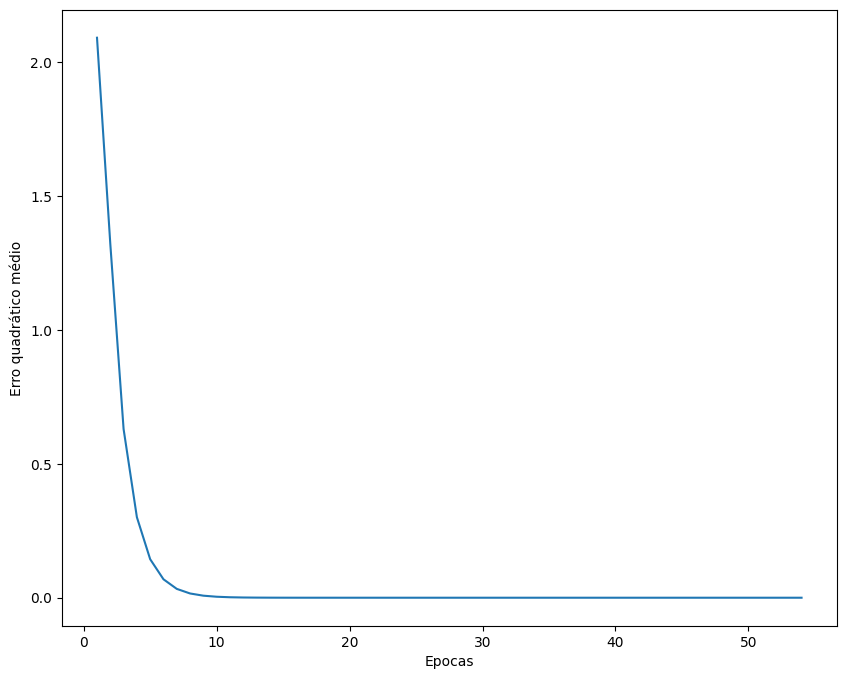

In [9]:
epocas = np.array(list(clf.histerr.keys()))
erro_quadratico_por_epoca = np.array(list(clf.histerr.values()))
plt.figure(figsize=(10,8))
plt.ylabel('Erro quadrático médio')
plt.xlabel('Epocas')
plt.plot(epocas, erro_quadratico_por_epoca)
plt.savefig('Error per epoch.png')



In [10]:
accuracy_score(y_train, clf.predict(x_train)) ,accuracy_score(y_test,y_hat)

(0.8733333333333333, 0.9)

In [11]:
c1= np.linspace(-3,3,1000)
c2 = (-c1 * clf.pesos[1]/clf.pesos[2]) + clf.pesos[0]

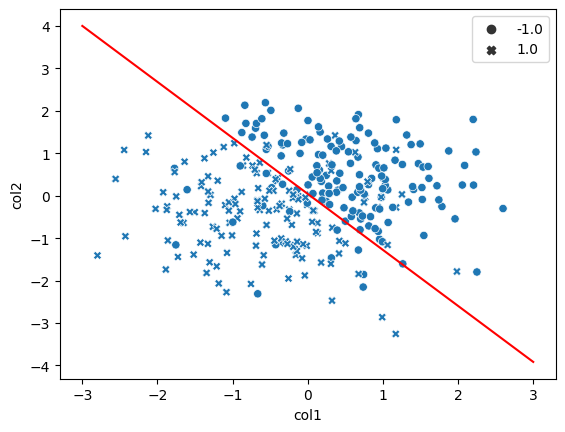

In [12]:
sns.scatterplot(data = train, x='col1',y='col2',style='target')
sns.lineplot(x=c1,y=c2,color='red')
plt.savefig('Best result, acc_test: 0.87 and acc_train: 0.9.png')

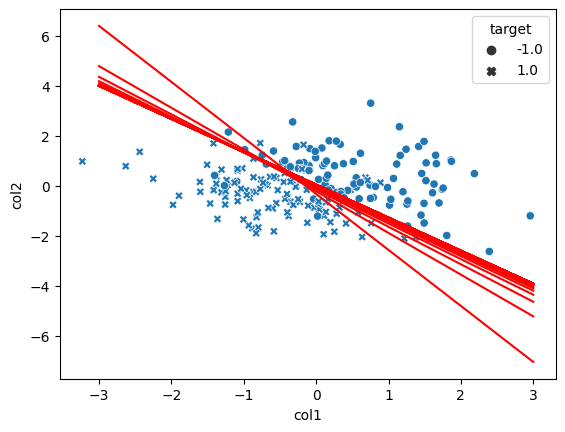

In [13]:
for x in range(3,50):
    peso = clf.histpeso[f"{x}"]
    c1= np.linspace(-3,3,1000)
    c2 = (-c1 * peso[1]/peso[2]) + peso[0]
    sns.lineplot(x=c1,y=c2,color='red')
sns.scatterplot(data = test, x='col1',y='col2',style='target')
plt.savefig('Training.png')    